## <center> Classification and Deep Learning approach to develop Credit Card Detection Fraud ML and DL models </center>

In [196]:
## libraries

import os

import numpy as np
import pandas as pd

import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import model_selection
from sklearn import ensemble
# from matplotlib import gridspec

import imblearn as imb

import warnings

from zipfile import ZipFile
import urllib.request
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")
pd.set_option( 'display.max_columns', 500 )

#### dataset

In [197]:
card_df_ori = pd.read_csv( 'dataset/creditCard.csv' )

In [200]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### `About the dataset`
The dataset records time in seconds from the initial transaction, spanning a total of two days for all transactions logged. The data's features are derived through Principal Component Analysis (PCA), which means they lack a direct physical meaning. The exceptions to PCA transformation are the 'Time' and 'Amount' features. The 'Class' feature serves as the dependent variable, indicating '1' for fraudulent transactions and '0' for non-fraudulent ones.

#### Exploring and Visualizing Data

Let's analyze the relative proportions of legitimate and fraudulent credit card transactions.

Fraudulent Cases: 492
Valid Transaction: 284315
Percent of Fraudulent case:  0.17



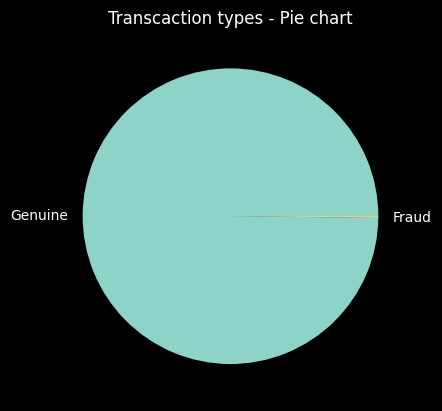

In [201]:
print( f"""Fraudulent Cases: {card_df[card_df['Class'] == 1].shape[0]}
Valid Transaction: {card_df[card_df['Class'] == 0].shape[0] }
Percent of Fraudulent case:  {np.round( 100 * card_df[card_df['Class'] == 1].shape[0] / card_df.shape[0], 2)}
""")
							

# To see how small are the number of Fraud transactions
pie_df = card_df.copy()
pie_df["transact_type"] = np.where( pie_df["Class"] == 1, "Fraud", "Genuine") 
pie_df["transact_type"].value_counts().plot(  kind="pie", ylabel= "", title= 'Transcaction types - Pie chart' );

There's a noticeable imbalance in the data, as only small fraction of the transactions are fraudulent. Further, let's compare the transaction amounts between valid and fraudulent cases.

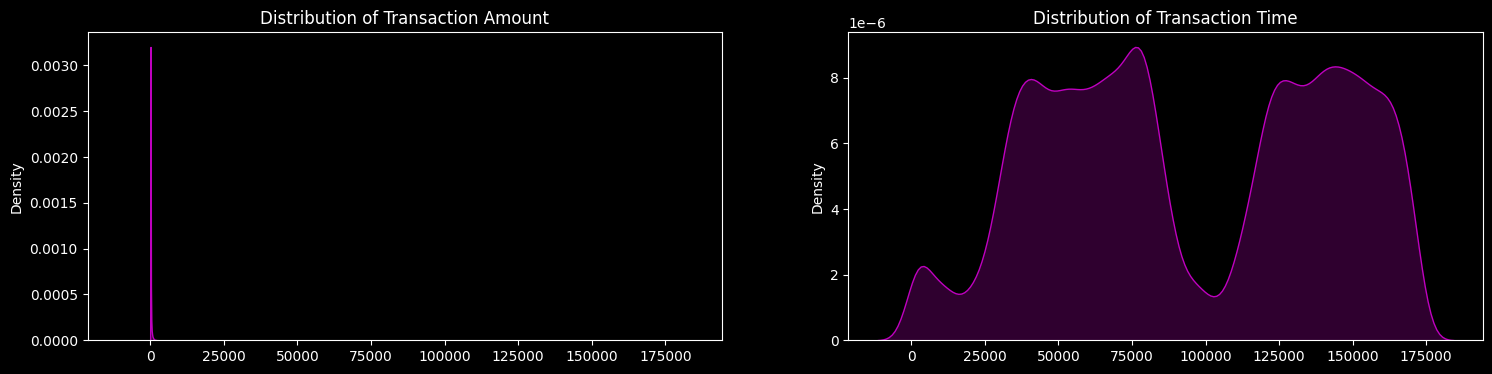

In [202]:
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_val = card_df['Amount'].values
time_val = card_df['Time'].values

sns.distplot(amount_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Transaction Amount')
sns.distplot(time_val, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Transaction Time')

plt.show()

In [203]:
print(f"Average Amount in a Fraudulent Transaction: {np.round( card_df[card_df['Class'] == 1]['Amount'].mean(), 2 )}" )
print(f"Average Amount in a Valid Transaction: {np.round( card_df[card_df['Class'] == 0]['Amount'].mean(), 2 )}" )

Average Amount in a Fraudulent Transaction: 122.21
Average Amount in a Valid Transaction: 88.29


It's evident that the average transaction amount is higher for fraudulent cases, highlighting the importance of addressing this issue. Next, we'll examine the distribution of values for each feature, beginning with 'Amount'.

In [204]:
print( f"""Summary of the feature - Amount\n
{card_df["Amount"].describe()}
	""")

Summary of the feature - Amount

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
	


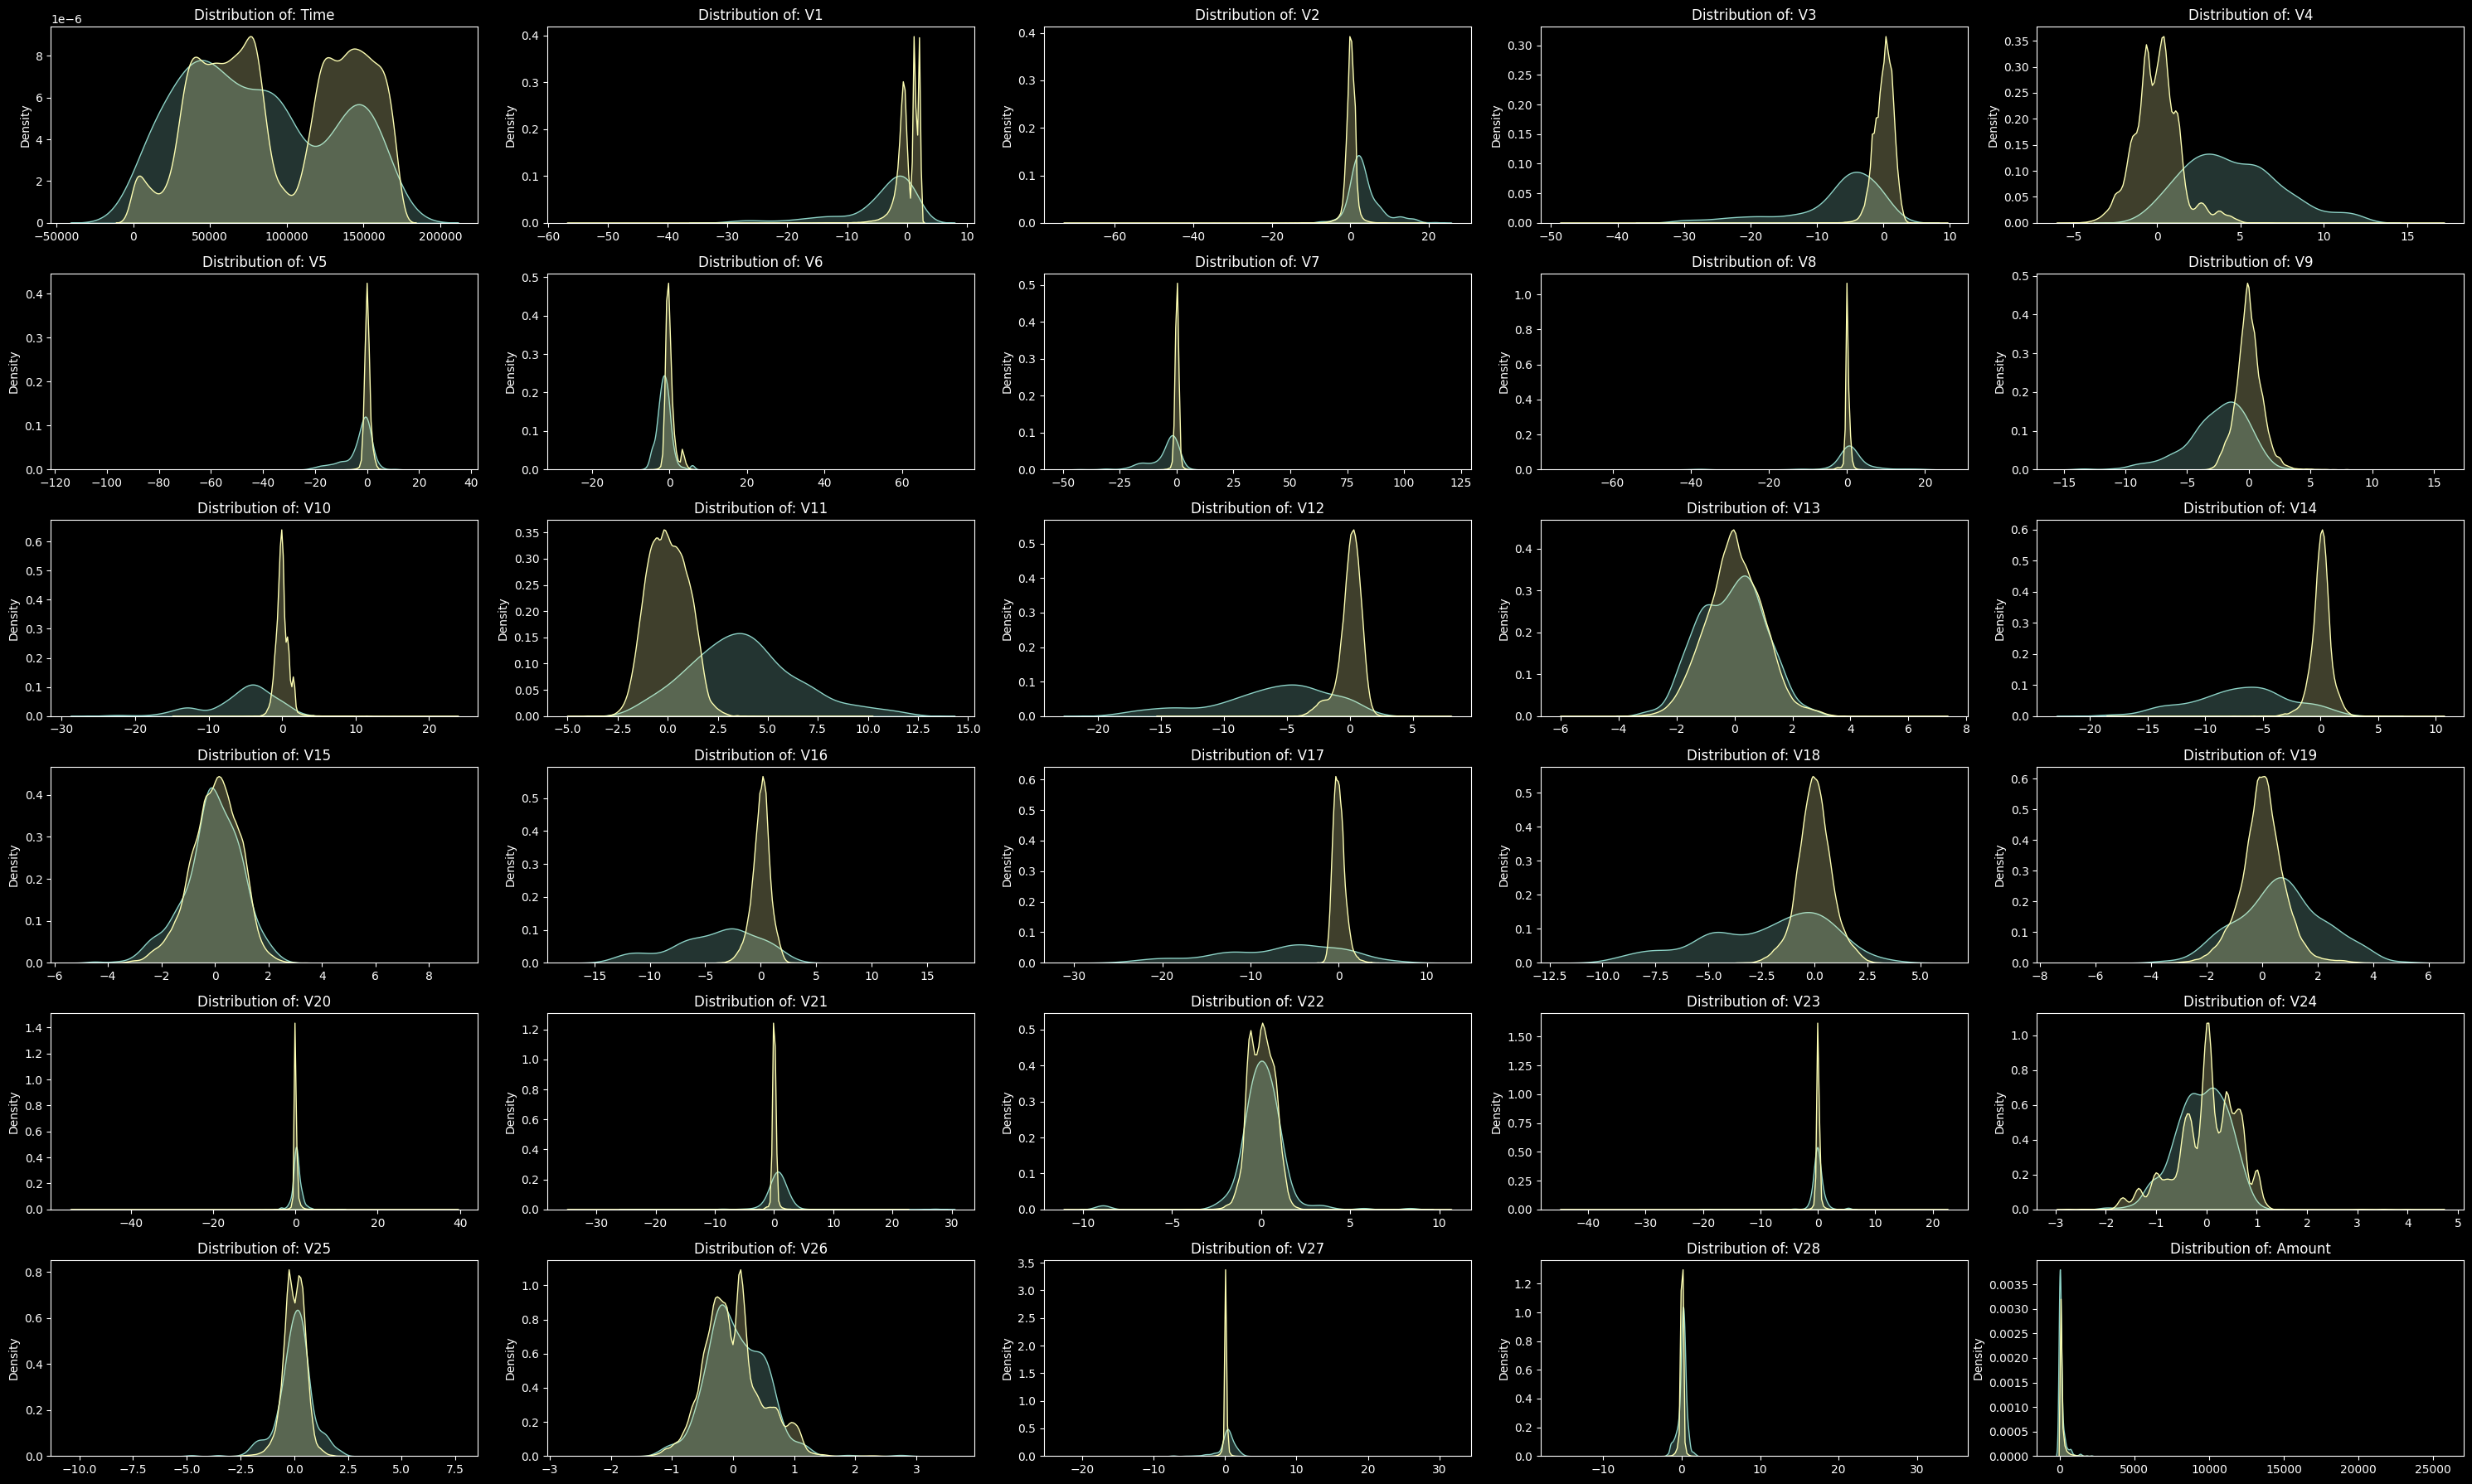

In [205]:
fg, ax = plt.subplots( 6,5, figsize=(30, 3*6)  )

for idx, eax in enumerate( ax.flatten() ):
	sns.distplot(  card_df.loc[ card_df['Class'] == 1, card_df.columns[idx]] , hist=False, kde_kws={'shade': True}, bins=50, ax= eax  )
	sns.distplot(  card_df.loc[ card_df['Class'] == 0, card_df.columns[idx]] , hist=False, kde_kws={'shade': True}, bins=50, ax= eax  )
	eax.set_xlabel('')
	eax.set_title( f'Distribution of: {card_df.columns[idx]}')

plt.tight_layout(); plt.show()

### Data prep

In [206]:
card_df.isnull().shape[0]
print("Number of cases with non-missing values: " + str(card_df.isnull().shape[0]))
print("Number of cases with missing values: " + str(card_df.shape[0] - card_df.isnull().shape[0]))

Number of cases with non-missing values: 284807
Number of cases with missing values: 0


Since there are no missing data points, we'll proceed with standardization, applying the RobustScaler specifically to the 'Time' and 'Amount' features.

In [207]:
scaler = sklearn.preprocessing.RobustScaler().fit(card_df[["Time", "Amount"]])
card_df[["Time", "Amount"]] = scaler.transform(card_df[["Time", "Amount"]])

pd.concat(  [ card_df.head(), card_df.tail() ]  )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


#### Modeling
We begin the modeling process by separating the data into response variables and features. We will also perform a train-test split to facilitate further modeling and validation.

In [208]:
# Separate response and features
y = card_df["Class"]
X = card_df.iloc[:,0:30]

xtrn, xtst, ytrn, ytst = sklearn.model_selection.train_test_split( 
	X, y, test_size = 0.2, random_state = 42 )

Given the identified imbalance in the dataset, using it as-is likely leads to a model biased towards the majority class. Let's initially test a Random Forest model on this imbalanced data to evaluate the extent of potential overfitting towards the majority class.

In [209]:
## random forest
randForest = sklearn.ensemble.RandomForestClassifier()
randForest.fit( xtrn, ytrn )

RandomForestClassifier()

In [210]:
yhat = randForest.predict( xtst )

In [211]:
## perfermance metrics

print(  f"""
Accuracy --> {np.round( sklearn.metrics.accuracy_score(ytst,yhat), 2 )},
Precision --> {np.round( sklearn.metrics.precision_score(ytst,yhat), 2 )},
Recall --> {np.round( sklearn.metrics.recall_score(ytst,yhat), 2 )},
F-score --> {np.round( sklearn.metrics.f1_score(ytst,yhat), 2 )},
"""
)


Accuracy --> 1.0,
Precision --> 0.96,
Recall --> 0.79,
F-score --> 0.87,



It's important to note that with only 0.17% of fraudulent transactions, a model that predicts all transactions as valid would achieve a deceptively high accuracy. To address this, we will use Oversampling and Undersampling techniques. Oversampling increases the size of the minority class by replicating its data points, whereas Undersampling reduces the size of the majority class by merging or removing similar data points, both aiming to balance the class proportions.

### Undersampling

Note that we won't undersample the test data because we want our model to handle skewed class distributions effectively in real-world scenarios.

The procedure is outlined as follows, utilizing the imbalance-learn module:
* Implement 5-fold cross-validation on the training set.
* Apply undersampling to each training fold.
* Train the model on these modified training folds and then validate it on the corresponding validation fold.

In [212]:
strf_kfold = sklearn.model_selection.StratifiedGroupKFold(  n_splits= 5, shuffle= True, random_state= 10  )

#### Undersampling - Logistic Regression

In [213]:
# import sklearn.linear_model
imb_pipeline = imb.pipeline.make_pipeline(  imb.under_sampling.NearMiss(), sklearn.linear_model.LogisticRegression()  )
_logistic_Hparam = {  'penalty': ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100],  'solver' : ['liblinear']  }
## updating the keys string with a prefix 'logisticregression__'
logistic_Hparam = {  f'logisticregression__{ek}': ev  for ek, ev in _logistic_Hparam.items()  }
print( logistic_Hparam )

{'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': [0.01, 0.1, 1, 100], 'logisticregression__solver': ['liblinear']}


In [214]:
grdSrc_logisticReg_model = sklearn.model_selection.GridSearchCV(  imb_pipeline, param_grid= logistic_Hparam,
																  cv= strf_kfold, return_train_score= True  )
grdSrc_logisticReg_model.fit(  xtrn, ytrn  )

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('nearmiss', NearMiss()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 100],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']},
             return_train_score=True)

In [215]:
logistic_CVscore_np = sklearn.model_selection.cross_val_score(  grdSrc_logisticReg_model, xtrn, ytrn,
																scoring= 'recall', cv= 5 )

In [216]:
ytst_hat = grdSrc_logisticReg_model.best_estimator_.named_steps['logisticregression'].predict( xtst )

logistic_accuracy_us = sklearn.metrics.accuracy_score( ytst, ytst_hat )
f1_Score_logis = sklearn.metrics.f1_score( ytst, ytst_hat )
logistic_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat )
precision_logis = sklearn.metrics.precision_score( ytst, ytst_hat )

In [217]:
print(  f"""
Accuracy --> {np.round(logistic_accuracy_us,2)},
Precision --> {np.round(precision_logis,2)},
Recall --> {np.round( logistic_recall_us, 2 )},
F-score --> {np.round( f1_Score_logis, 2 )},
"""
)


Accuracy --> 0.51,
Precision --> 0.0,
Recall --> 0.93,
F-score --> 0.01,



In [218]:
yProb_hat = grdSrc_logisticReg_model.best_estimator_.named_steps['logisticregression'].predict_proba(xtst)[::, 1]

fpr, tpr, _ = sklearn.metrics.roc_curve( ytst, yProb_hat )
auc_score = sklearn.metrics.roc_auc_score( ytst, yProb_hat )

metric_df1 = pd.DataFrame(  { 'classifiers':'Logistic Regression', 'fpr': fpr, 'tpr': tpr, 'auc': auc_score }  )

print( metric_df1.shape ); print( metric_df1.head(3) )

(1040, 4)
           classifiers       fpr       tpr       auc
0  Logistic Regression  0.000000  0.000000  0.909582
1  Logistic Regression  0.000018  0.000000  0.909582
2  Logistic Regression  0.000018  0.010204  0.909582


#### Undersampling - Random Forest 

In [219]:
# import sklearn.linear_model
imb_pipeline = imb.pipeline.make_pipeline(  imb.under_sampling.NearMiss(),
											sklearn.ensemble.RandomForestClassifier()  )
_Hparam = {  'n_estimators': [50,100,200], 'max_depth': [4, 6, 10, 12], 'random_state': [10]  }
## updating the keys string with a prefix 'logisticregression__'
Hparam = {  f'randomforestclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

grdSrc_rForest_model = sklearn.model_selection.GridSearchCV(  imb_pipeline, param_grid= Hparam,
															  cv = strf_kfold, return_train_score= True  )

In [220]:
grdSrc_rForest_model.fit( xtrn, ytrn )

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('nearmiss', NearMiss()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [10]},
             return_train_score=True)

In [221]:
ytst_hat = grdSrc_rForest_model.best_estimator_.named_steps['randomforestclassifier'].predict( xtst )

In [222]:
rfc_cv_score_us = sklearn.model_selection.cross_val_score(  grdSrc_rForest_model, xtrn, ytrn,
															scoring='recall', cv= strf_kfold  )

In [223]:
rfc_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat )


In [224]:
rfc_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat )
rfc_accuracy_us = sklearn.metrics.accuracy_score( ytst, ytst_hat)
rfc = grdSrc_rForest_model.best_estimator_

In [225]:
yProb_hat = grdSrc_rForest_model.best_estimator_.named_steps['randomforestclassifier'].predict_proba(xtst)[::, 1]

fpr, tpr, _ = sklearn.metrics.roc_curve( ytst, yProb_hat )
auc_score = sklearn.metrics.roc_auc_score( ytst, yProb_hat )

metric_df2 = pd.DataFrame(  { 'classifiers':'Random Forest', 'fpr': fpr, 'tpr': tpr, 'auc': auc_score }  )

print( metric_df2.shape ); print( metric_df2.head(3) )

(8381, 4)
     classifiers       fpr       tpr       auc
0  Random Forest  0.000000  0.000000  0.942894
1  Random Forest  0.000000  0.020408  0.942894
2  Random Forest  0.000123  0.489796  0.942894


#### Undersampling - Support Vector Classifier

In [226]:
# import sklearn.linear_model
imb_pipeline = imb.pipeline.make_pipeline(  imb.under_sampling.NearMiss(),
											sklearn.svm.SVC(probability=True)  )
_Hparam = {  'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']  }
## updating the keys string with a prefix 'logisticregression__'
Hparam = {  f'svc__{ek}': ev  for ek, ev in _Hparam.items()  }

grdSrc_svc_model = sklearn.model_selection.GridSearchCV(  imb_pipeline, param_grid= Hparam,
														  cv = strf_kfold, return_train_score= True  )

In [227]:
grdSrc_svc_model.fit( xtrn, ytrn )

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('nearmiss', NearMiss()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.5, 0.7, 0.9, 1],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True)

In [228]:
svc_cv_score_us = sklearn.model_selection.cross_val_score( grdSrc_svc_model, xtrn, ytrn, scoring='recall', cv= strf_kfold  ) 

In [229]:
yhat = grdSrc_svc_model.best_estimator_.named_steps['svc'].predict(xtst)
svc_recall_us = sklearn.metrics.recall_score( ytst, yhat )
svc_accuracy_us = sklearn.metrics.accuracy_score( ytst, yhat )

In [230]:
f1_socre_svc = sklearn.metrics.f1_score( ytst, yhat )
recall_svc = sklearn.metrics.recall_score( ytst, yhat )
precision_svc = sklearn.metrics.precision_score( ytst, yhat )
print( f1_socre_svc, recall_svc, precision_svc )

0.052615478739675745 0.8775510204081632 0.027120782087669507


In [231]:
conf = sklearn.metrics.confusion_matrix( ytst, yhat )

In [232]:
yProb_hat = grdSrc_svc_model.best_estimator_.named_steps['svc'].predict_proba(xtst)[::, 1]

fpr, tpr, _ = sklearn.metrics.roc_curve( ytst, yProb_hat )
auc_score = sklearn.metrics.roc_auc_score( ytst, yProb_hat )

metric_df3 = pd.DataFrame(  { 'classifiers':'SVC', 'fpr': fpr, 'tpr': tpr, 'auc': auc_score }  )

print( metric_df3.shape ); print( metric_df3.head(3) )

(266, 4)
  classifiers  fpr       tpr       auc
0         SVC  0.0  0.000000  0.958302
1         SVC  0.0  0.010204  0.958302
2         SVC  0.0  0.051020  0.958302


#### Undersampling - Decision Tree Classifier

In [233]:
# import sklearn.linear_model
imb_pipeline = imb.pipeline.make_pipeline(  imb.under_sampling.NearMiss(),
											sklearn.tree.DecisionTreeClassifier()  )
_Hparam = {  'criterion': ['gini', 'entropy'], 'max_depth': list( range(2,4,1) ), 'min_samples_leaf': list( range(5,7,1) )  }
## updating the keys string with a prefix 'logisticregression__'
Hparam = {  f'decisiontreeclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

grdSrc_dtree_model = sklearn.model_selection.GridSearchCV(  imb_pipeline, param_grid= Hparam,
														  cv = strf_kfold, return_train_score= True  )

In [234]:
grdSrc_dtree_model.fit( xtrn, ytrn )

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('nearmiss', NearMiss()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [2, 3],
                         'decisiontreeclassifier__min_samples_leaf': [5, 6]},
             return_train_score=True)

In [235]:
dtree_cv_score_us = sklearn.model_selection.cross_val_score( grdSrc_dtree_model, xtrn, ytrn,
															 scoring='recall', cv= 5  )

In [236]:
ytst_hat = grdSrc_dtree_model.best_estimator_.named_steps['decisiontreeclassifier'].predict(xtst)
dtree_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat  )
dtree_accuracy_us = sklearn.metrics.accuracy_score( ytst, ytst_hat  )

In [237]:
dtree_accuracy_us, dtree_recall_us, dtree_cv_score_us

(0.7037498683332748,
 0.8979591836734694,
 array([0.94871795, 0.83544304, 0.87341772, 0.88607595, 0.89873418]))

In [238]:
yProb_hat = grdSrc_dtree_model.best_estimator_.named_steps['decisiontreeclassifier'].predict_proba(xtst)[::, 1]

fpr, tpr, _ = sklearn.metrics.roc_curve( ytst, yProb_hat )
auc_score = sklearn.metrics.roc_auc_score( ytst, yProb_hat )

metric_df5 = pd.DataFrame(  { 'classifiers':'Decision Tree', 'fpr': fpr, 'tpr': tpr, 'auc': auc_score }  )

print( metric_df5.shape ); print( metric_df5.head(3) )

(5, 4)
     classifiers       fpr       tpr       auc
0  Decision Tree  0.000000  0.000000  0.699841
1  Decision Tree  0.240592  0.051020  0.699841
2  Decision Tree  0.296585  0.897959  0.699841


#### Undersampling - k-Nearest Neighbour Classifier

In [239]:
# import sklearn.linear_model
imb_pipeline = imb.pipeline.make_pipeline(  imb.under_sampling.NearMiss(),
											sklearn.neighbors.KNeighborsClassifier()  )
_Hparam = {  'n_neighbors': list( range(2,5,1) ), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  }
## updating the keys string with a prefix 'logisticregression__'
Hparam = {  f'kneighborsclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

grdSrc_knn_model = sklearn.model_selection.GridSearchCV(  imb_pipeline, param_grid= Hparam,
														  cv = strf_kfold, return_train_score= True  )

In [240]:
grdSrc_knn_model.fit( xtrn, ytrn )

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('nearmiss', NearMiss()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [2, 3, 4]},
             return_train_score=True)

In [241]:
knn_cv_score_us = sklearn.model_selection.cross_val_score(  grdSrc_knn_model, xtrn, ytrn,
															scoring='recall', cv= strf_kfold  )

In [242]:
# ytst_hat = grdSrc_knn_model.best_estimator_.named_steps['kneighborsclassifier'].predict(xtst)

In [243]:
ytst_hat = grdSrc_knn_model.best_estimator_.named_steps['kneighborsclassifier'].predict(xtst.reset_index(drop=True).to_numpy())
knear_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat  )
knear_accuracy_us = sklearn.metrics.accuracy_score( ytst, ytst_hat  )

In [244]:
yProb_hat = grdSrc_dtree_model.best_estimator_.named_steps['decisiontreeclassifier'].predict_proba(xtst)[::, 1]

fpr, tpr, _ = sklearn.metrics.roc_curve( ytst, yProb_hat )
auc_score = sklearn.metrics.roc_auc_score( ytst, yProb_hat )

metric_df4 = pd.DataFrame(  { 'classifiers':'k nearest neighbour', 'fpr': fpr, 'tpr': tpr, 'auc': auc_score }  )

print( metric_df4.shape ); print( metric_df4.head(3) )

(5, 4)
           classifiers       fpr       tpr       auc
0  k nearest neighbour  0.000000  0.000000  0.699841
1  k nearest neighbour  0.240592  0.051020  0.699841
2  k nearest neighbour  0.296585  0.897959  0.699841


#### Gathering the undersampling model performances


In [245]:
# Gather the scores
metric_ls = [
	[ 'Logistic Regression', logistic_CVscore_np.mean(), logistic_accuracy_us, logistic_recall_us ], 
	[ 'Random Forest', rfc_cv_score_us.mean(), rfc_accuracy_us, rfc_recall_us ], 
	[ 'Support Vector', svc_cv_score_us.mean(), svc_accuracy_us, svc_recall_us ],
	[ 'Decision Tree', dtree_cv_score_us.mean(), dtree_accuracy_us, dtree_recall_us ],
	[ 'k-Nearest Neighbour', knn_cv_score_us.mean(), knear_accuracy_us, knear_recall_us ]
]

metric_comb_df = pd.DataFrame( metric_ls, columns = ['Classifier', 'CV Score', 'Accuracy', 'Recall Score'] ) 
metric_comb_df

,Classifier,CV Score,Accuracy,Recall Score
0,Logistic Regression,0.890912,0.506513,0.928571
1,Random Forest,NaN,0.441242,0.948980
2,Support Vector,NaN,0.945630,0.877551
3,Decision Tree,0.888478,0.703750,0.897959
4,k-Nearest Neighbour,NaN,0.811699,0.928571


In [246]:
metric_comb_df[ 'Classifier' ].unique()

array(['Logistic Regression', 'Random Forest', 'Support Vector',
       'Decision Tree', 'k-Nearest Neighbour'], dtype=object)

In [247]:
metric_auc_df = (
	pd.concat(  [ metric_df1, metric_df2, metric_df3, metric_df4, metric_df5 ], ignore_index= True  )
	.groupby( 'classifiers' ).agg(  { 'fpr': list, 'tpr': list, 'auc': np.median }  )
	.reset_index()
)
metric_auc_df

,classifiers,fpr,tpr,auc
0,Decision Tree,"[0.0, 0.24059158694428812, 0.29658483398987057...","[0.0, 0.05102040816326531, 0.8979591836734694,...",0.699841
1,Logistic Regression,"[0.0, 1.758581879572313e-05, 1.758581879572313...","[0.0, 0.0, 0.01020408163265306, 0.010204081632...",0.909582
2,Random Forest,"[0.0, 0.0, 0.0001231007315700619, 0.0001231007...","[0.0, 0.02040816326530612, 0.4897959183673469,...",0.942894
3,SVC,"[0.0, 0.0, 0.0, 1.758581879572313e-05, 1.75858...","[0.0, 0.01020408163265306, 0.05102040816326531...",0.958302
4,k nearest neighbour,"[0.0, 0.24059158694428812, 0.29658483398987057...","[0.0, 0.05102040816326531, 0.8979591836734694,...",0.699841


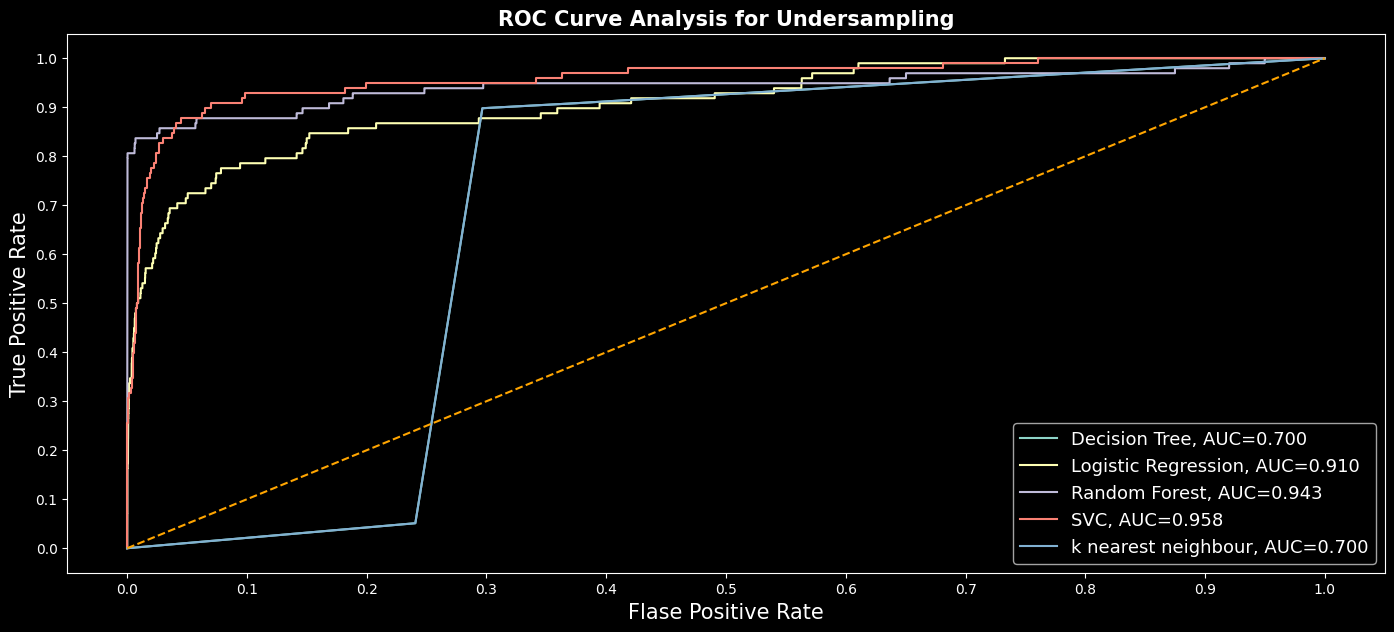

In [248]:
# Plot the ROC curve for undersampling
metric_auc_df.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for i in metric_auc_df.index:
	plt.plot(metric_auc_df.loc[i]['fpr'], 
			 metric_auc_df.loc[i]['tpr'], 
			 label="{}, AUC={:.3f}".format(i, metric_auc_df.loc[i]['auc']))
	
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [249]:
metric_auc_df

,fpr,tpr,auc
classifiers,,,
Decision Tree,"[0.0, 0.24059158694428812, 0.29658483398987057...","[0.0, 0.05102040816326531, 0.8979591836734694,...",0.699841
Logistic Regression,"[0.0, 1.758581879572313e-05, 1.758581879572313...","[0.0, 0.0, 0.01020408163265306, 0.010204081632...",0.909582
Random Forest,"[0.0, 0.0, 0.0001231007315700619, 0.0001231007...","[0.0, 0.02040816326530612, 0.4897959183673469,...",0.942894
SVC,"[0.0, 0.0, 0.0, 1.758581879572313e-05, 1.75858...","[0.0, 0.01020408163265306, 0.05102040816326531...",0.958302
k nearest neighbour,"[0.0, 0.24059158694428812, 0.29658483398987057...","[0.0, 0.05102040816326531, 0.8979591836734694,...",0.699841


In [250]:
### Plot LogisticRegression Learning Curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
						n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
	
	f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
	if ylim is not None:
		plt.ylim(*ylim)
	# First Estimator
	train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
		estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
	train_scores_mean = np.mean(train_scores, axis=1)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1)
	test_scores_std = np.std(test_scores, axis=1)
	ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
					 train_scores_mean + train_scores_std, alpha=0.1,
					 color="r")
	ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
					 test_scores_mean + test_scores_std, alpha=0.1, color="g")
	ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
			 label="Training score")
	ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
			 label="Cross-validation score")
	ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
	ax1.set_xlabel('Training size (m)')
	ax1.set_ylabel('Score')
	ax1.grid(True)
	ax1.legend(loc="best")
	
	# Second Estimator 
	train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
		estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
	train_scores_mean = np.mean(train_scores, axis=1)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1)
	test_scores_std = np.std(test_scores, axis=1)
	ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
					 train_scores_mean + train_scores_std, alpha=0.1,
					 color="r")
	ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
					 test_scores_mean + test_scores_std, alpha=0.1, color="g")
	ax2.plot(train_sizes, train_scores_mean, 'o-', color="r",
			 label="Training score")
	ax2.plot(train_sizes, test_scores_mean, 'o-', color="g",
			 label="Cross-validation score")
	ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
	ax2.set_xlabel('Training size (m)')
	ax2.set_ylabel('Score')
	ax2.grid(True)
	ax2.legend(loc="best")
	
	# Third Estimator
	train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
		estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
	train_scores_mean = np.mean(train_scores, axis=1)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1)
	test_scores_std = np.std(test_scores, axis=1)
	ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
					 train_scores_mean + train_scores_std, alpha=0.1,
					 color="r")
	ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
					 test_scores_mean + test_scores_std, alpha=0.1, color="g")
	ax3.plot(train_sizes, train_scores_mean, 'o-', color="r",
			 label="Training score")
	ax3.plot(train_sizes, test_scores_mean, 'o-', color="g",
			 label="Cross-validation score")
	ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
	ax3.set_xlabel('Training size (m)')
	ax3.set_ylabel('Score')
	ax3.grid(True)
	ax3.legend(loc="best")
	
	# Fourth Estimator
	train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(
		estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "recall")
	train_scores_mean = np.mean(train_scores, axis=1)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1)
	test_scores_std = np.std(test_scores, axis=1)
	ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
					 train_scores_mean + train_scores_std, alpha=0.1,
					 color="r")
	ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
					 test_scores_mean + test_scores_std, alpha=0.1, color="g")
	ax4.plot(train_sizes, train_scores_mean, 'o-', color="r",
			 label="Training score")
	ax4.plot(train_sizes, test_scores_mean, 'o-', color="g",
			 label="Cross-validation score")
	ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
	ax4.set_xlabel('Training size (m)')
	ax4.set_ylabel('Score')
	ax4.grid(True)
	ax4.legend(loc="best")
	

	return plt

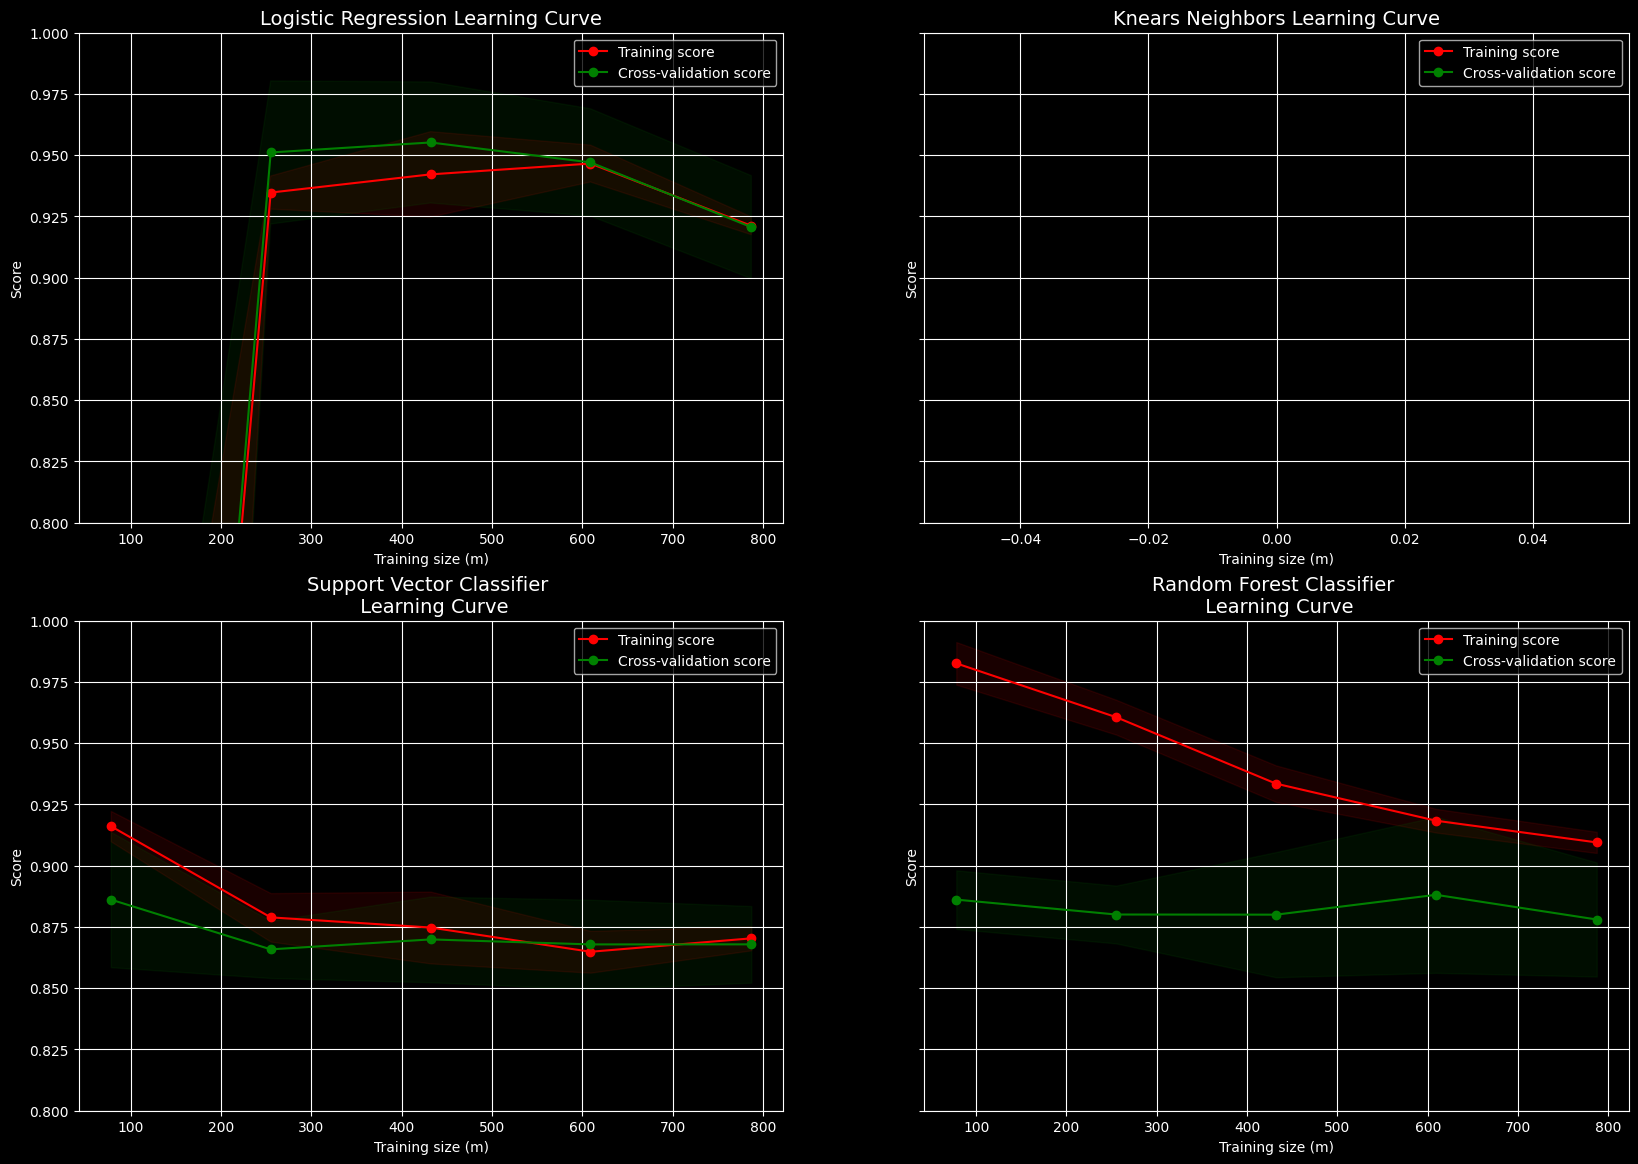

In [251]:
# Let's Plot LogisticRegression Learning Curve
cv = sklearn.model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
df = card_df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
y = new_df['Class']
X = new_df.iloc[ :, 0:30 ]

plot_learning_curve(	grdSrc_logisticReg_model, grdSrc_knn_model, grdSrc_svc_model, grdSrc_rForest_model,
						X, y, ( 0.8, 1 )  );

#### Analyzing the Learning Curve
Let's evaluate four different models to observe how training and cross-validation scores evolve with changes in training size. A cross-validation generator will partition the complete dataset into training and test subsets k times. We will train the models on subsets of the training data of increasing sizes and calculate the performance scores for each size. These scores will then be averaged across all k iterations for each subset size, providing insights into how each model's performance is affected by the amount of training data.

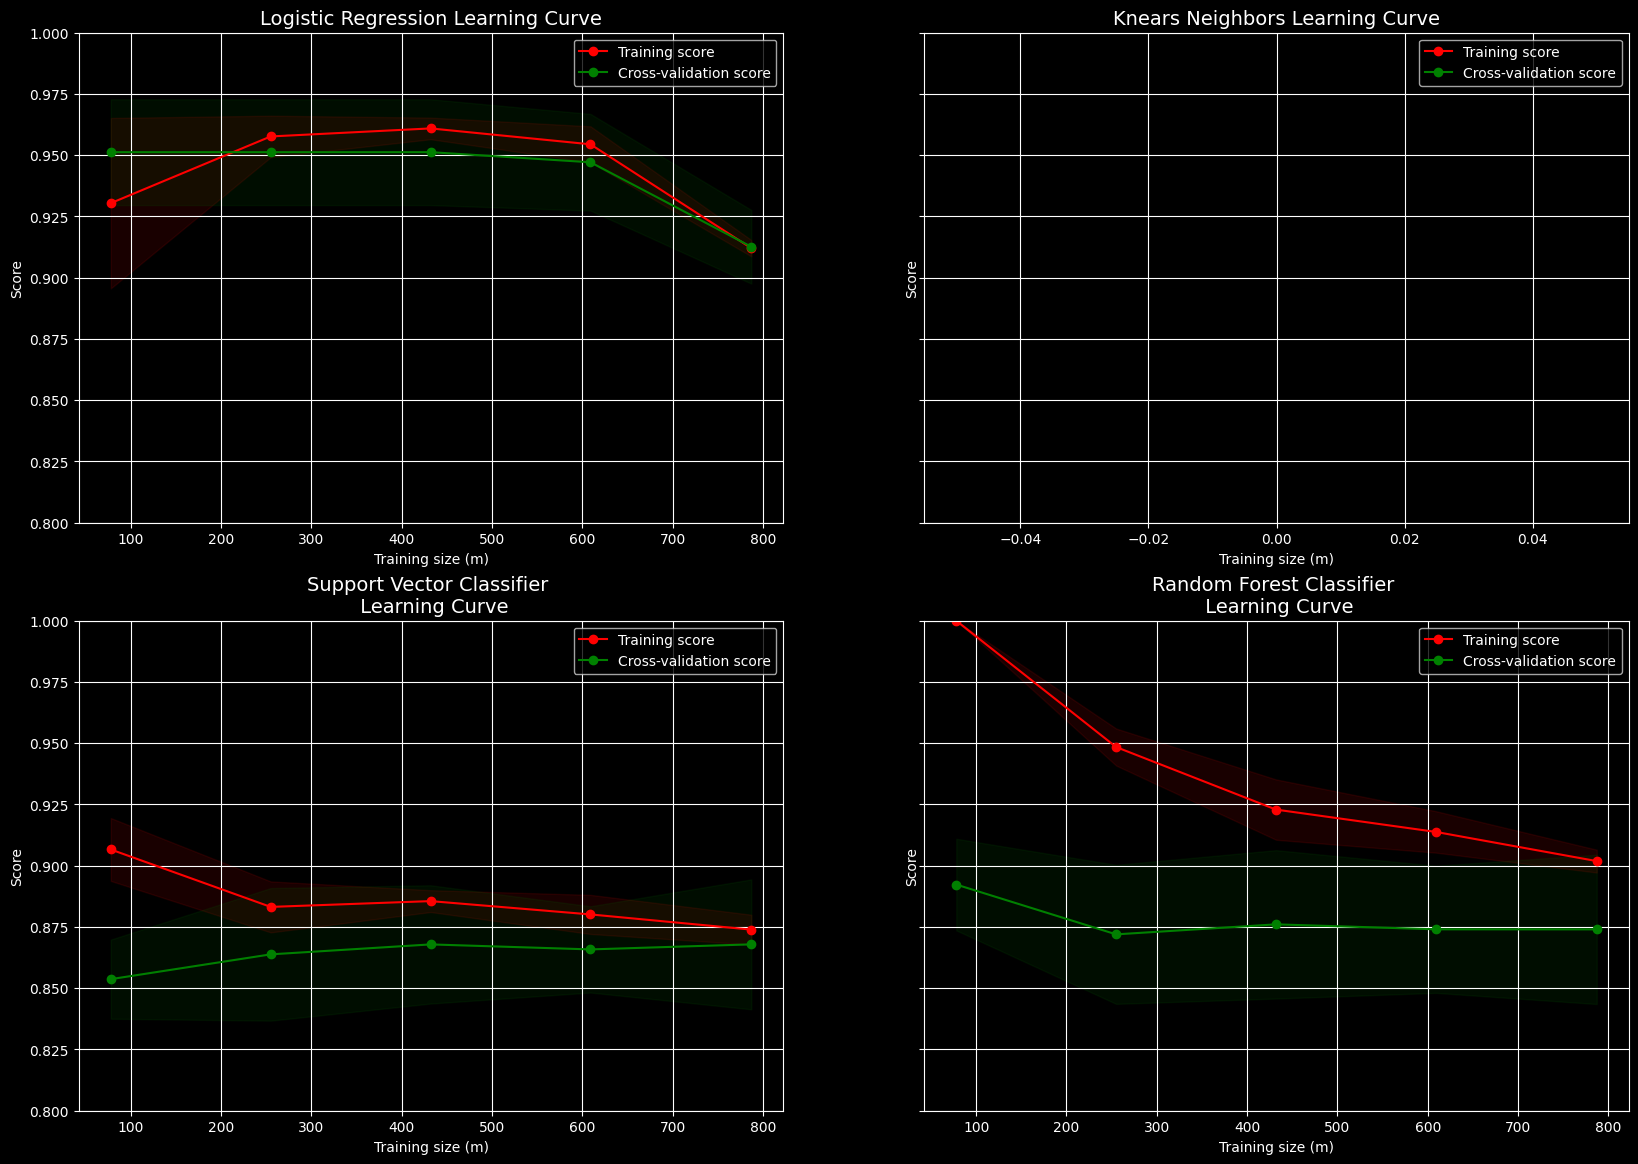

In [252]:
cv = sklearn.model_selection.ShuffleSplit(  n_splits= 100, test_size= 0.2, random_state= 42  )

df = card_df.sample( frac= 1 )

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat( [fraud_df, non_fraud_df] )

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
y = new_df[ 'Class' ]
X = new_df.iloc[ :, 0:30 ]

plot_learning_curve(  grdSrc_logisticReg_model, grdSrc_knn_model, grdSrc_svc_model, grdSrc_rForest_model, X, y, (0.8,1) );

### Oversampling Strategy

Employing oversampling to address class imbalance in the training data. It’s important to note that we will not oversample the test data, as we aim for the model to effectively handle imbalanced classes in real-world scenarios.

Implementation of imbalance-learn module:
1. Conduct a 5-fold cross-validation on the training set.
2. Apply oversampling to each training fold.
3. Train the model using the oversampled training folds and perform validation on the corresponding validation fold.

Use optimal model parameters identified through a grid-search algorithm during the undersampling phase to ensure the best performance.

In [253]:
imba_pipeline = imb.pipeline.make_pipeline(  imb.over_sampling.SMOTE(random_state=10), sklearn.linear_model.LogisticRegression()  )

_Hparam = {  'penalty': ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100],   'solver' : ['liblinear']  }
Hparam = {  f'logisticregression__{ek}': ev  for ek, ev in _Hparam.items()  }

ran_imba_log_reg = sklearn.model_selection.RandomizedSearchCV(  imba_pipeline, param_distributions= Hparam,
															  	cv= strf_kfold, scoring='recall', return_train_score= True  )
ran_imba_log_reg.fit( xtrn, ytrn )
logistic_cv_score_os = sklearn.model_selection.cross_val_score(  ran_imba_log_reg, xtrn, ytrn, scoring = 'recall', cv = strf_kfold  )

y_test_predict = ran_imba_log_reg.best_estimator_.named_steps['logisticregression'].predict(xtst)
logistic_recall_os = sklearn.metrics.recall_score( ytst, ytst_hat )
logistic_accuracy_os = sklearn.metrics.accuracy_score( ytst, ytst_hat  )
acc_logis = sklearn.metrics.accuracy_score( ytst, ytst_hat )

log_reg_os = ran_imba_log_reg.best_estimator_

### RandomForestClassifier - under sample

In [254]:
imba_pipeline = imb.pipeline.make_pipeline(   imb.over_sampling.SMOTE(random_state=10),
										   	  sklearn.ensemble.RandomForestClassifier()   )
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

_Hparam = {   'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [13]   }
Hparam = {  f'randomforestclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

ran_imba_rf = sklearn.model_selection.RandomizedSearchCV(  imba_pipeline, param_distributions= Hparam,
												  	cv= strf_kfold, scoring= 'recall', return_train_score= True  )

ran_imba_rf.fit( xtrn, ytrn )

rf_cv_score_os = sklearn.model_selection.cross_val_score(  ran_imba_rf, xtrn, ytrn, scoring = 'recall', cv = strf_kfold  )
ytst_hat = ran_imba_rf.best_estimator_.named_steps['randomforestclassifier'].predict(xtst)
rfc_recall_os = sklearn.metrics.recall_score( ytst, ytst_hat)
rfc_accuracy_os = sklearn.metrics.accuracy_score( ytst, ytst_hat)
rfc_os = ran_imba_rf.best_estimator_

#### SVC

In [270]:
imba_pipeline = imb.pipeline.make_pipeline(  imb.over_sampling.SMOTE(random_state=10), sklearn.svm.SVC()  )

_Hparam = {  'C': [0.5, 0.7], 'kernel': ['sigmoid', 'linear']  }
Hparam = {  f'svc__{ek}': ev  for ek, ev in _Hparam.items()  }

ran_imba_svc = sklearn.model_selection.RandomizedSearchCV(  imba_pipeline, param_distributions= Hparam,
															cv= strf_kfold, scoring='recall', return_train_score= True  )
ran_imba_svc.fit(  xtrn, ytrn )

svc_cv_score_os = sklearn.model_selection.cross_val_score(  ran_imba_svc, xtrn, ytrn, scoring = 'recall', cv = strf_kfold  )

ytst_hat = ran_imba_svc.best_estimator_.named_steps['svc'].predict( xtst )
svc_recall_os = sklearn.metrics.recall_score( ytst, ytst_hat )
svc_accuracy_os = sklearn.metrics.accuracy_score( ytst, ytst_hat)



svc_os = ran_imba_svc.best_estimator_

### Decision Tree

In [271]:
imba_pipeline = imb.pipeline.make_pipeline(  imb.over_sampling.SMOTE(random_state=10),  sklearn.tree.DecisionTreeClassifier()  )

_Hparam = {   "criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))  }
Hparam = {  f'decisiontreeclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

ran_imba_tree = sklearn.model_selection.RandomizedSearchCV(  imba_pipeline, param_distributions= Hparam,
															 cv= strf_kfold, scoring='recall', return_train_score= True)
ran_imba_tree.fit( xtrn, ytrn );

dtree_cv_score_os = sklearn.model_selection.cross_val_score(  ran_imba_tree, xtrn, ytrn, scoring = 'recall', cv = strf_kfold  ) 

ytst_hat = ran_imba_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(xtst)
dtree_recall_os = sklearn.metrics.recall_score( ytst, ytst_hat )
dtree_accuracy_os = sklearn.metrics.accuracy_score( ytst, ytst_hat)


tree_os = ran_imba_tree.best_estimator_

#### KNN

In [272]:
imba_pipeline = imb.pipeline.make_pipeline(  imb.over_sampling.SMOTE(random_state=10), sklearn.neighbors.KNeighborsClassifier()  )
#cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

_Hparam = {  'n_neighbors': list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  }
Hparam = {  f'kneighborsclassifier__{ek}': ev  for ek, ev in _Hparam.items()  }

ran_imba_knn = sklearn.model_selection.RandomizedSearchCV(  imba_pipeline, param_distributions= Hparam,
												   	 cv= strf_kfold, scoring='recall', return_train_score= True  )
ran_imba_knn.fit( xtrn, ytrn)

knear_cv_score_os = sklearn.model_selection.cross_val_score(  ran_imba_knn, xtrn, ytrn, scoring = 'recall', cv = strf_kfold  )

# ytst_hat = ran_imba_knn.best_estimator_.named_steps['kneighborsclassifier'].predict(xtst)
knear_recall_os = sklearn.metrics.recall_score( ytst, ytst_hat)

knear_accuracy_os = sklearn.metrics.accuracy_score( ytst, ytst_hat)


knears_neighbors_os = ran_imba_knn.best_estimator_

In [273]:
knn_accuracy_us = sklearn.metrics.accuracy_score( ytst, ytst_hat)
knn_recall_us = sklearn.metrics.recall_score( ytst, ytst_hat )
knn = grdSrc_rForest_model.best_estimator_

In [274]:
# Gather the scores
final_score_ls =  [['Logistic Regression', logistic_accuracy_us, logistic_accuracy_os, logistic_recall_us, logistic_recall_os], 
	['Random Forest', rfc_accuracy_us, rfc_accuracy_os, rfc_recall_us, rfc_recall_os], 
	['Support Vector', svc_accuracy_us, svc_accuracy_os, svc_recall_us, svc_recall_os],
	['Decision Tree', dtree_accuracy_us, dtree_accuracy_os, dtree_recall_us, dtree_recall_os],
	['k-Nearest Neighbour', knear_accuracy_us, knear_accuracy_os, knear_recall_us, knear_recall_os]
	     ] 
  
# Create the dataframe 
finalScore_df = pd.DataFrame( final_score_ls, columns =  [ 'Classifier', 'Accuracy_UnderSampling', 'Accuracy_Oversampling',
								   'Recall_UnderSampling', 'Recall_Oversampling' ]  ) 
finalScore_df

,Classifier,Accuracy_UnderSampling,Accuracy_Oversampling,Recall_UnderSampling,Recall_Oversampling
0,Logistic Regression,0.506513,0.811699,0.928571,0.928571
1,Random Forest,0.441242,0.995576,0.948980,0.887755
2,Support Vector,0.945630,0.466788,0.877551,0.445545
3,Decision Tree,0.703750,0.970883,0.897959,0.851485
4,k-Nearest Neighbour,0.811699,0.970883,0.928571,0.851485


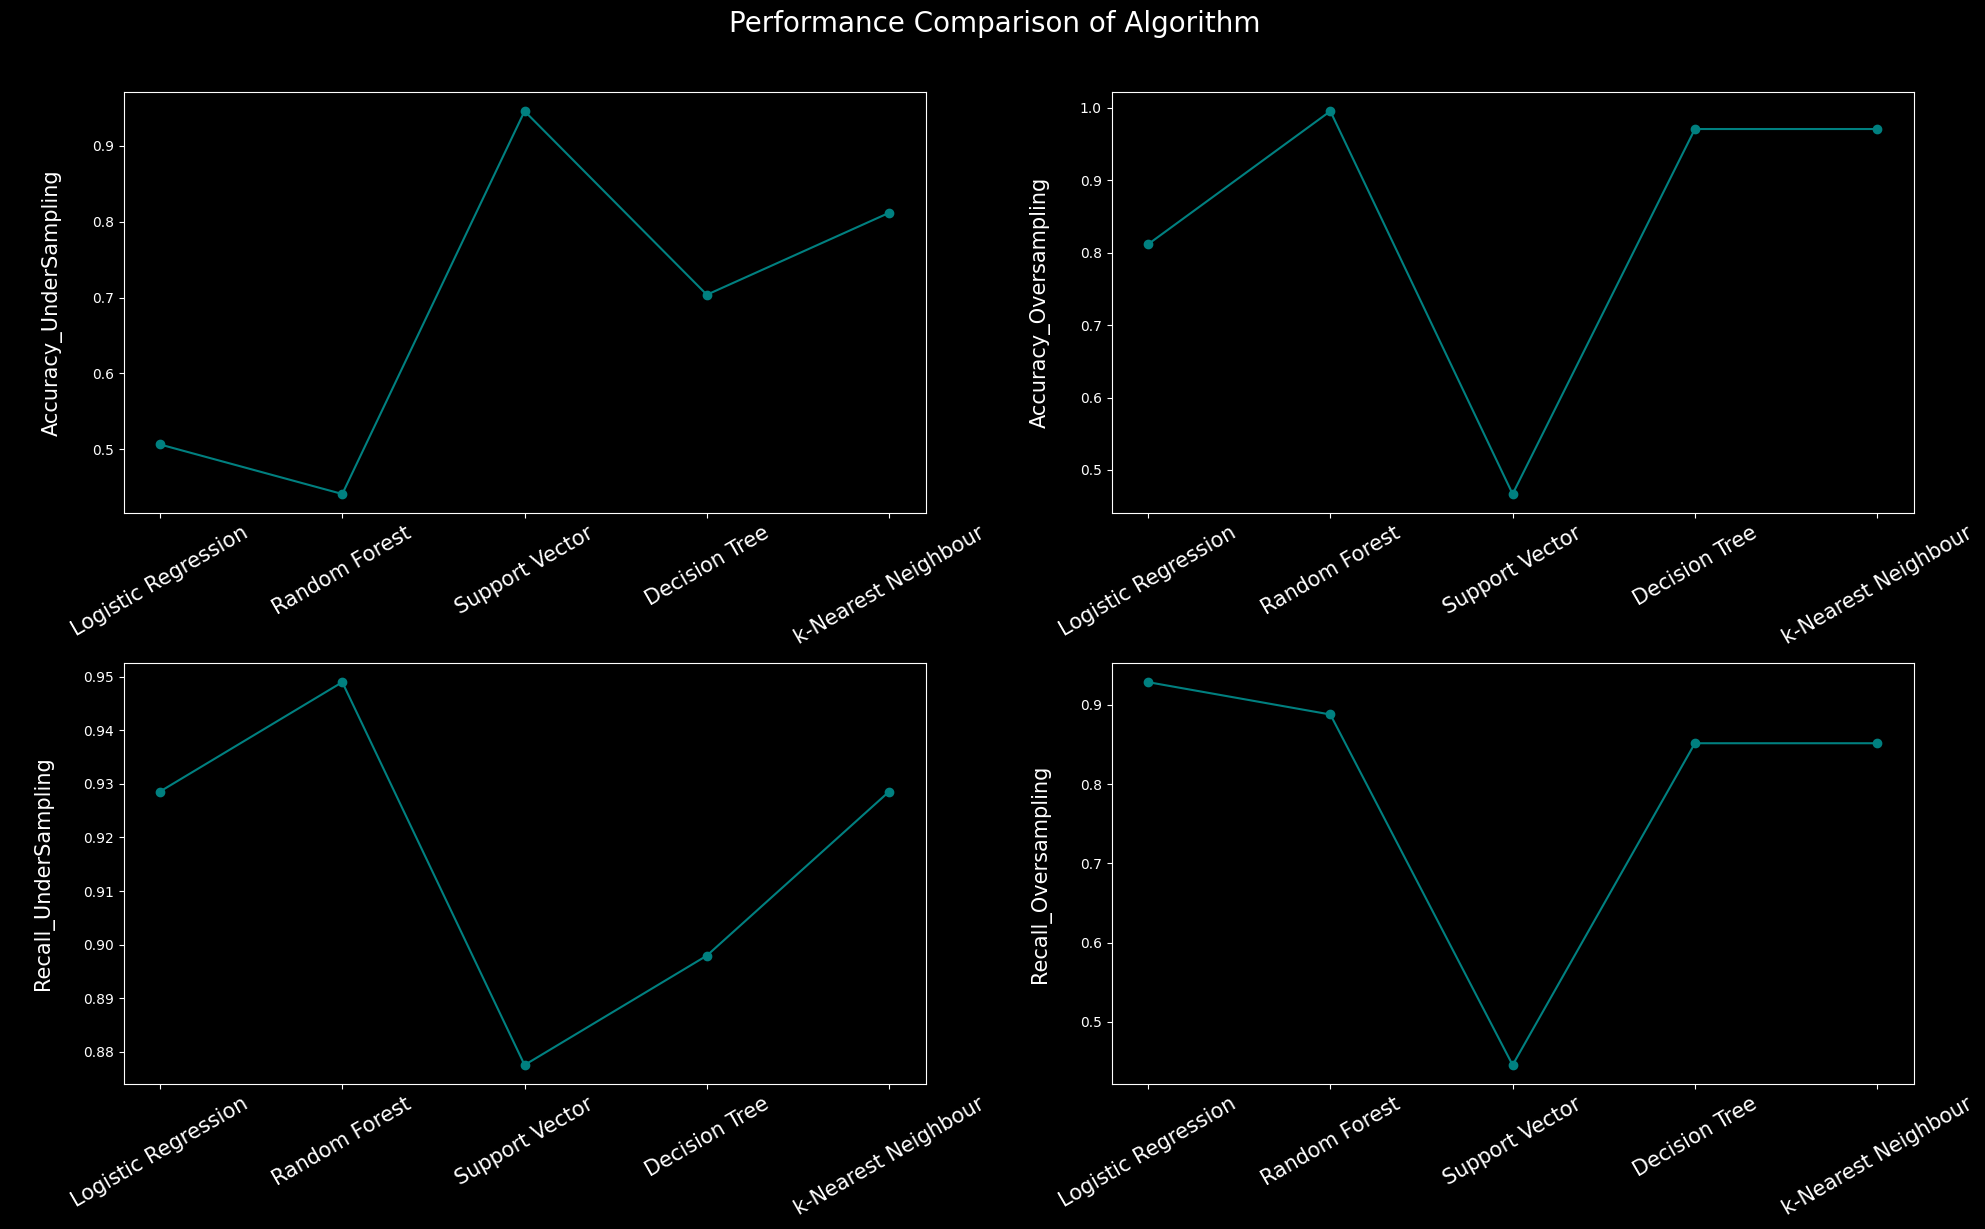

In [276]:
fg, ax = plt.subplots( 2, 2, figsize= ( 20,12 ) )

for eax, ecol in zip(  ax.flatten(), finalScore_df.columns[1:]  ):
	
	eax.plot(  finalScore_df['Classifier'].to_numpy(), finalScore_df[ecol].to_numpy(),
			  marker='o', linestyle='-', color='teal', label= ecol )
	eax.set_xticklabels( finalScore_df['Classifier'], rotation= 30 , fontsize= 15 )  
	eax.set_ylabel( f'\n{ecol}\n', fontsize= 15 )
	
fg.suptitle( 'Performance Comparison of Algorithm', fontsize= 20, y= 1.02 )

plt.tight_layout(); plt.show()	